In [1]:
from bbox_dataset import BBDataset
from tqdm import tqdm 
import torchvision.transforms as T
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD  = [0.229, 0.224, 0.225]

resize = 256 
crop_size =224
transforms =  T.Compose([
    T.Resize(resize),
    T.CenterCrop(crop_size),
    T.ToTensor(),
    T.Normalize(IMAGENET_MEAN, IMAGENET_STD)
    ])

bbox_path = "/data3/bumjin/bumjin_data/ILSVRC2012_bbox_val"
imagenet_path = "/data3/bumjin/bumjin_data/ILSVRC2012_val/val"
label_path= "/data3/bumjin/bumjin_data/ILSVRC2012_val/imagenet_label.json"
ds = BBDataset(bbox_path, imagenet_path, transforms, resize, crop_size, label_path=label_path)
# ds.collapse_dataset_with_bbox_ratio(0.25, 0.5)

for index in tqdm(range(len(ds))):
    img, info = ds[index]
    break
    
    # try:
    #     img, info = ds[index]
    # except:
    #     print(index)

  0%|          | 0/50000 [00:00<?, ?it/s]


In [2]:
img, info

(tensor([[[0.9474, 0.8276, 0.6392,  ..., 1.2899, 1.2557, 1.2557],
          [0.4337, 0.3652, 0.3138,  ..., 1.2385, 1.2214, 1.2214],
          [0.4508, 0.4337, 0.3652,  ..., 1.2214, 1.2385, 1.2557],
          ...,
          [1.0502, 1.2385, 1.1700,  ..., 1.1358, 1.1015, 1.1872],
          [1.1529, 1.1700, 1.0502,  ..., 1.0844, 0.9646, 1.0502],
          [1.1358, 1.0844, 1.1015,  ..., 0.8961, 0.7933, 1.0331]],
 
         [[1.1856, 1.0630, 0.9055,  ..., 1.5532, 1.5707, 1.5707],
          [0.6078, 0.5378, 0.5028,  ..., 1.5182, 1.5357, 1.5357],
          [0.5903, 0.5728, 0.5378,  ..., 1.5357, 1.5357, 1.5532],
          ...,
          [1.2556, 1.4482, 1.3782,  ..., 1.3081, 1.2906, 1.3782],
          [1.3606, 1.3782, 1.2556,  ..., 1.2731, 1.1506, 1.2556],
          [1.3256, 1.2906, 1.3081,  ..., 1.0280, 0.9405, 1.2381]],
 
         [[1.2108, 1.0539, 0.8099,  ..., 1.7685, 1.7685, 1.7685],
          [0.5834, 0.5136, 0.4439,  ..., 1.7337, 1.7511, 1.7337],
          [0.6356, 0.6182, 0.5659,  ...,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


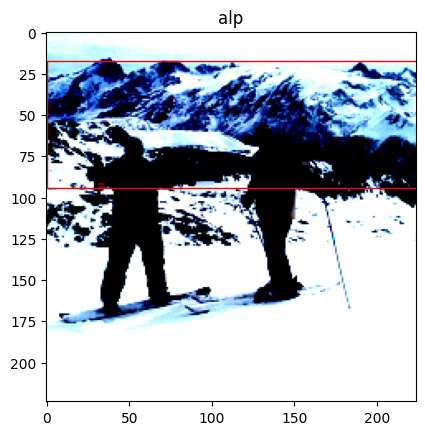

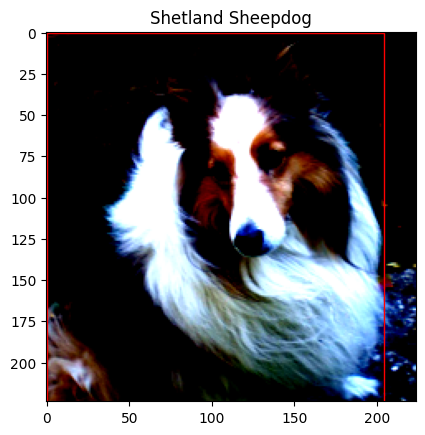

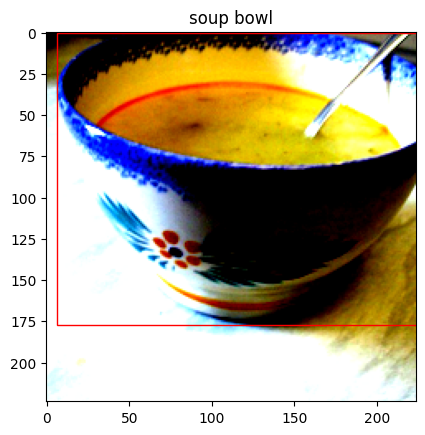

In [3]:

import matplotlib.pyplot as plt 
import matplotlib.patches as patches


for index in [1,2,3]:
    img, info = ds[index]
    bbox = info['bbox']
    rect = patches.Rectangle((bbox["xmin"], bbox['ymin']), bbox['xmax'] - bbox['xmin'], bbox['ymax'] - bbox['ymin'], linewidth=1, edgecolor='r', facecolor='none')
    fig, ax = plt.subplots()
    ax.imshow(img.permute(1,2,0))
    ax.set_title(info['label_human'])
    ax.add_patch(rect)

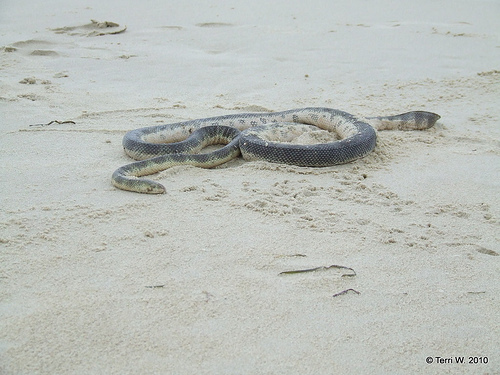

In [3]:
import torchvision 
imagenet_path = "/data3/bumjin/bumjin_data/ILSVRC2012_val"
valid_dataset = torchvision.datasets.ImageNet(root=imagenet_path, split="val")
valid_dataset[3250][0]